# Determine expression relationships between constructs
Correlations between aggregate replicates are compared

## Imports

In [1]:
import pandas as pd
from pathlib import Path
import sys

## Find the git root Directory

In [2]:
# Get the current working directory
cwd = Path.cwd()

if (cwd / ".git").is_dir():
    root_dir = cwd

else:
    root_dir = None
    for parent in cwd.parents:
        if (parent / ".git").is_dir():
            root_dir = parent
            break

# Check if a Git root directory was found
if root_dir is None:
    raise FileNotFoundError("No Git root directory found.")

## Import helper correlation class

In [3]:
sys.path.append(
    f"{root_dir}/0.data_analysis/construct_phenotypic_expression_plate_4_fs_data/utils"
)
import create_correlations as cc

## Define Paths

In [4]:
# Change this filename when plate 4 is available
filename = "Plate_4_sc_norm_fs.parquet"

# Path to the plate data
path = Path(
    f"{root_dir}/nf1_painting_repo/3.processing_features/data/feature_selected_data/{filename}"
)

# Add the output path here:
output_path = Path("figures")

# Create the directory if it doesn't exist
output_path.mkdir(parents=True, exist_ok=True)

## Load the data

In [5]:
platedf = pd.read_parquet(path)

## Create correlations object

In [6]:
corr_obj = cc.CreateCorrelations(platedf=platedf, aggregate=True)

/home/camo/projects/NF1_SchwannCell_data_analysis/0.data_analysis/construct_phenotypic_expression_plate_4_fs_data/utils/create_correlations.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.platedf["Metadata_group"] = self.platedf.apply(


## Create correlation pdfs

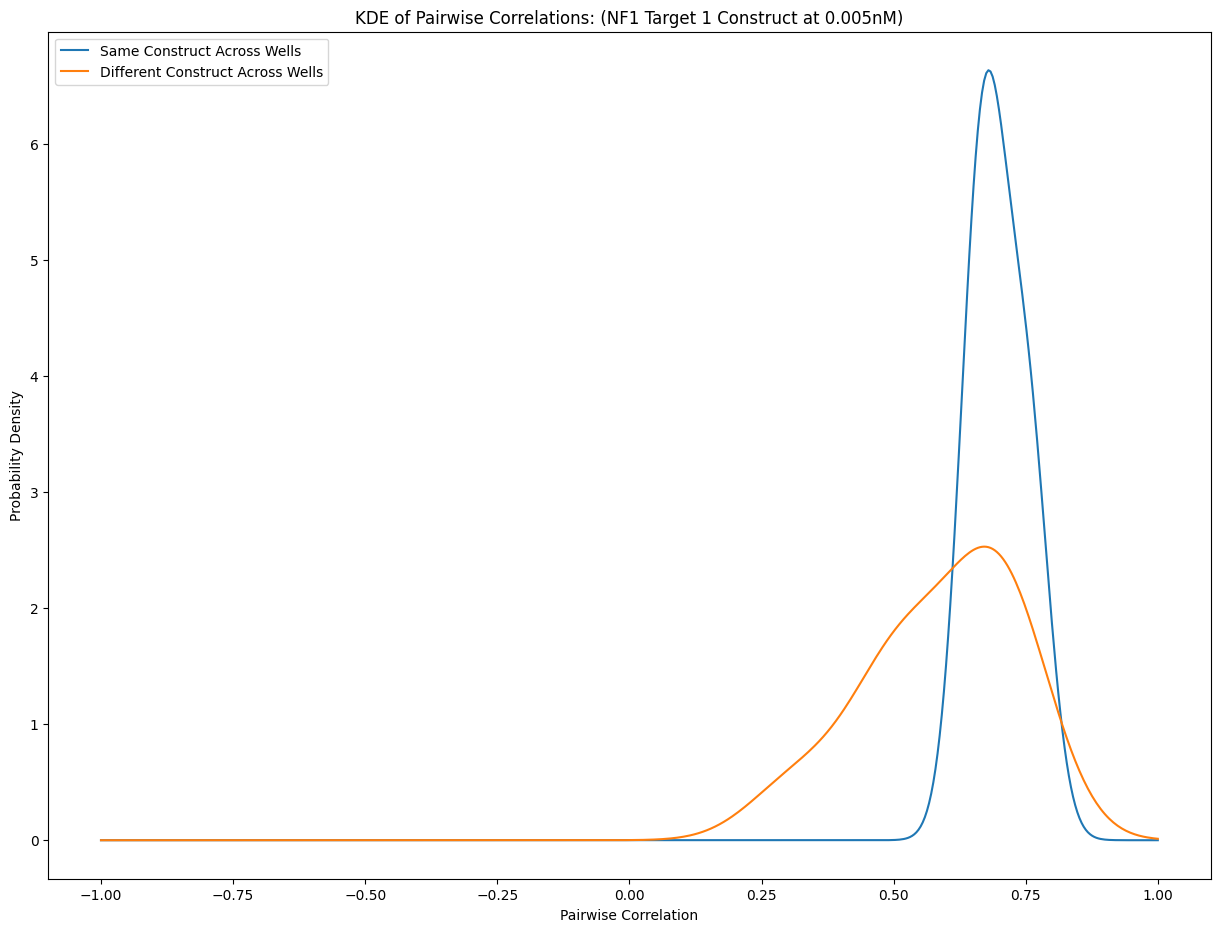

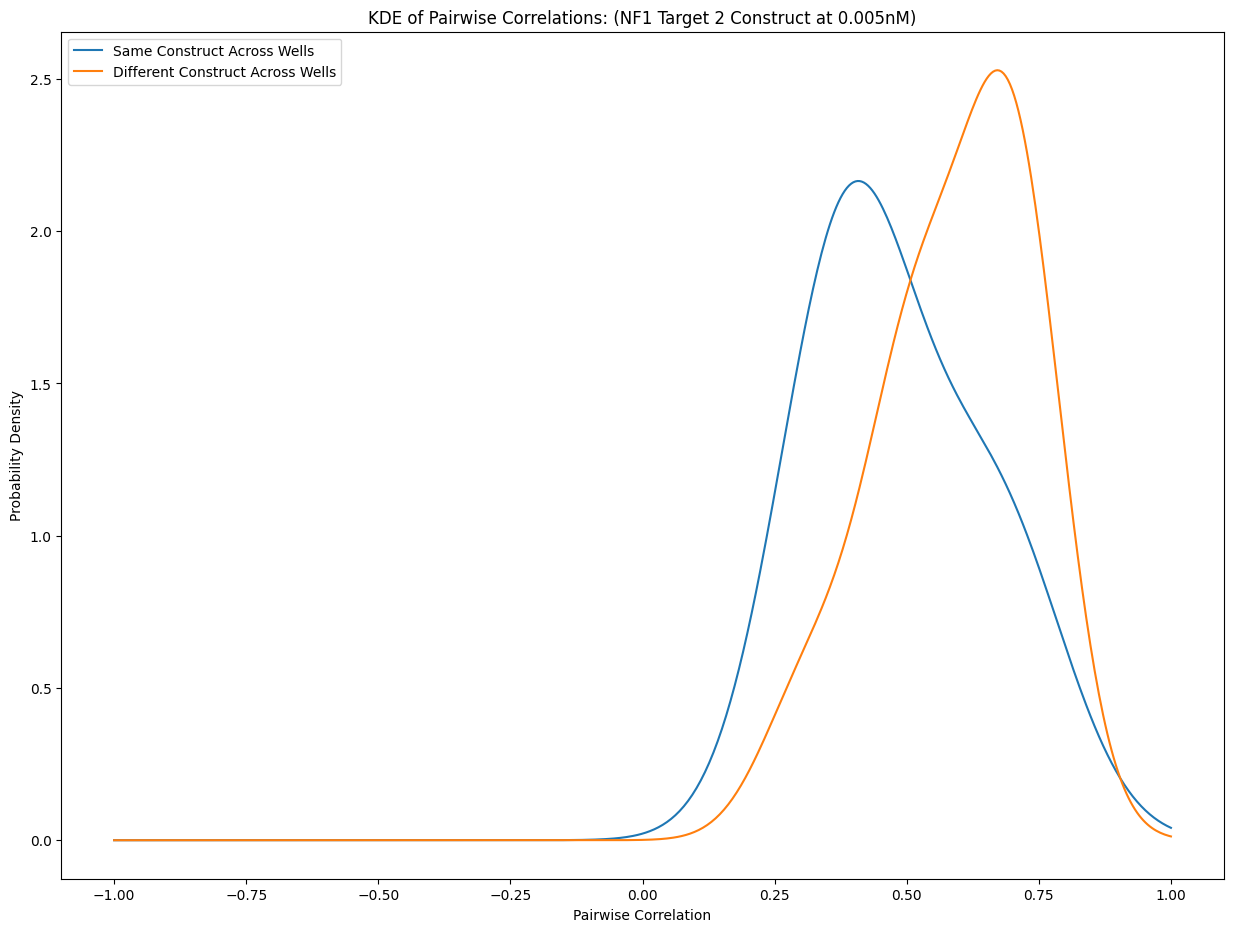

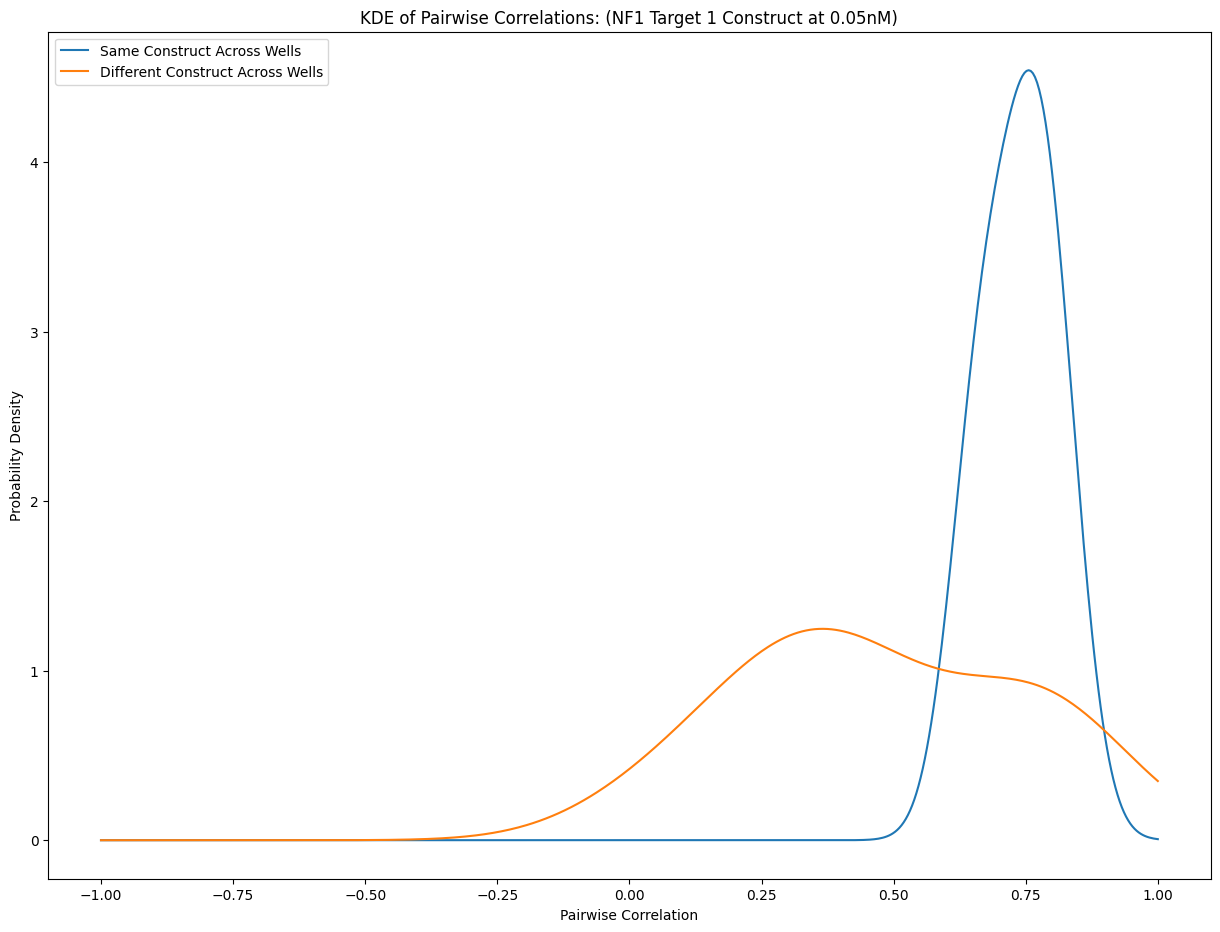

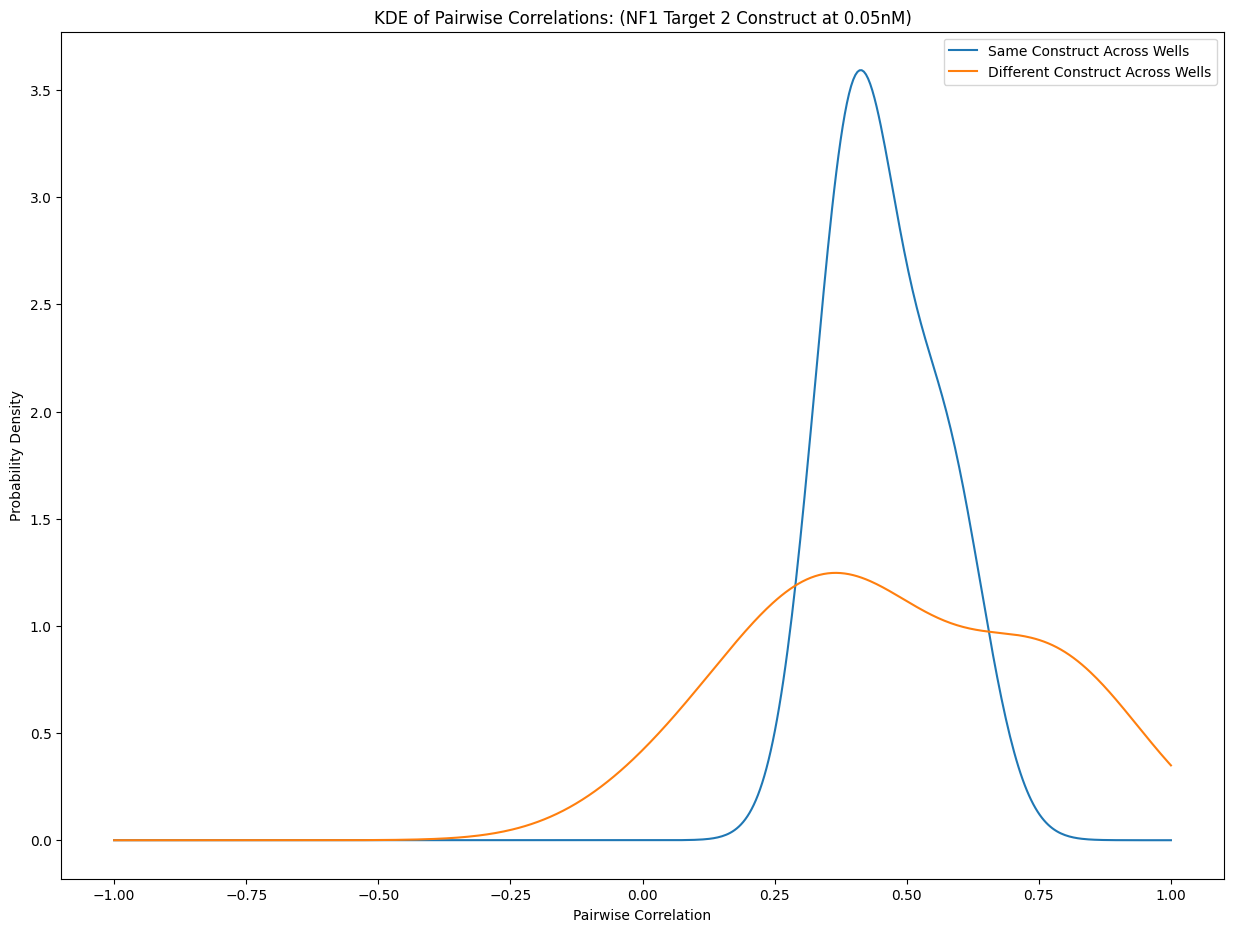

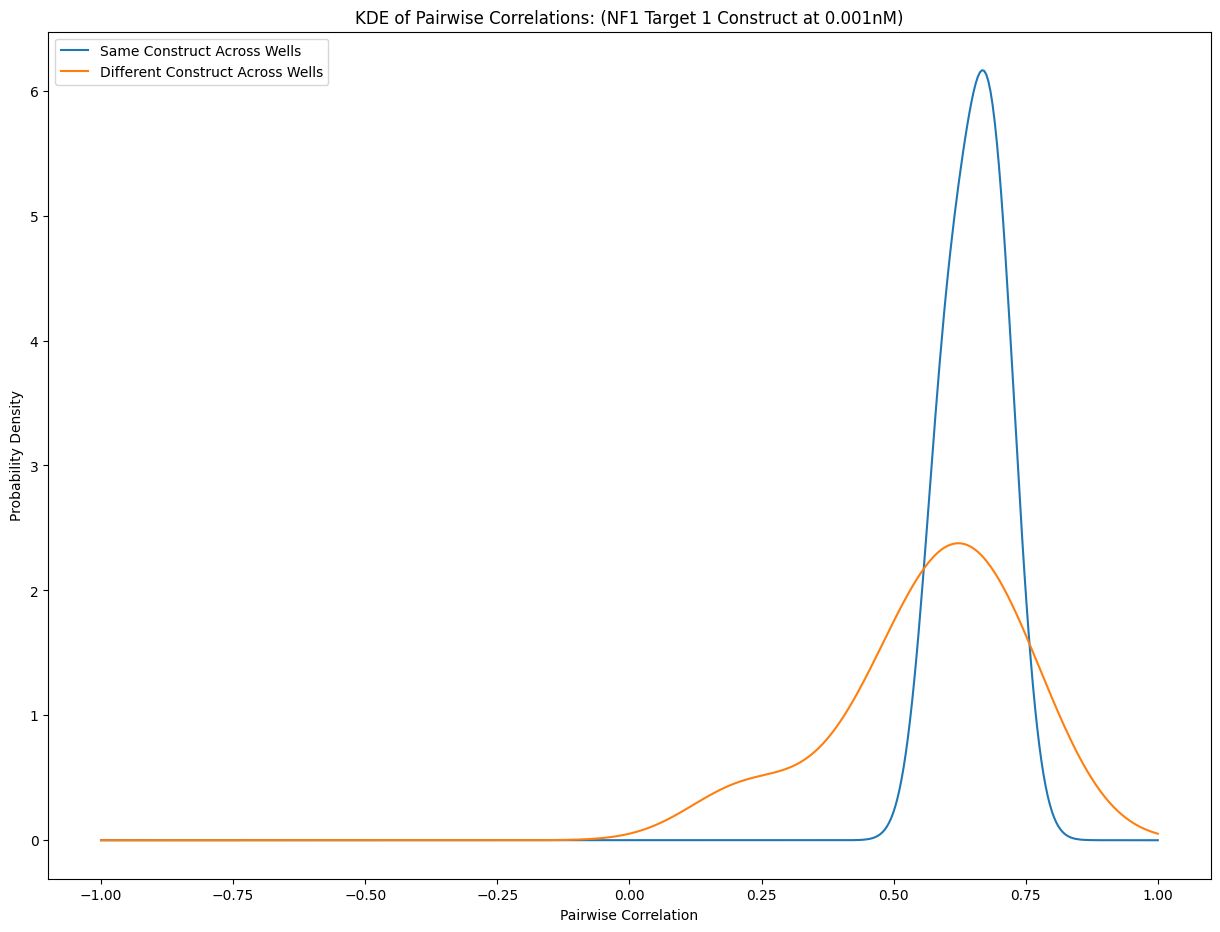

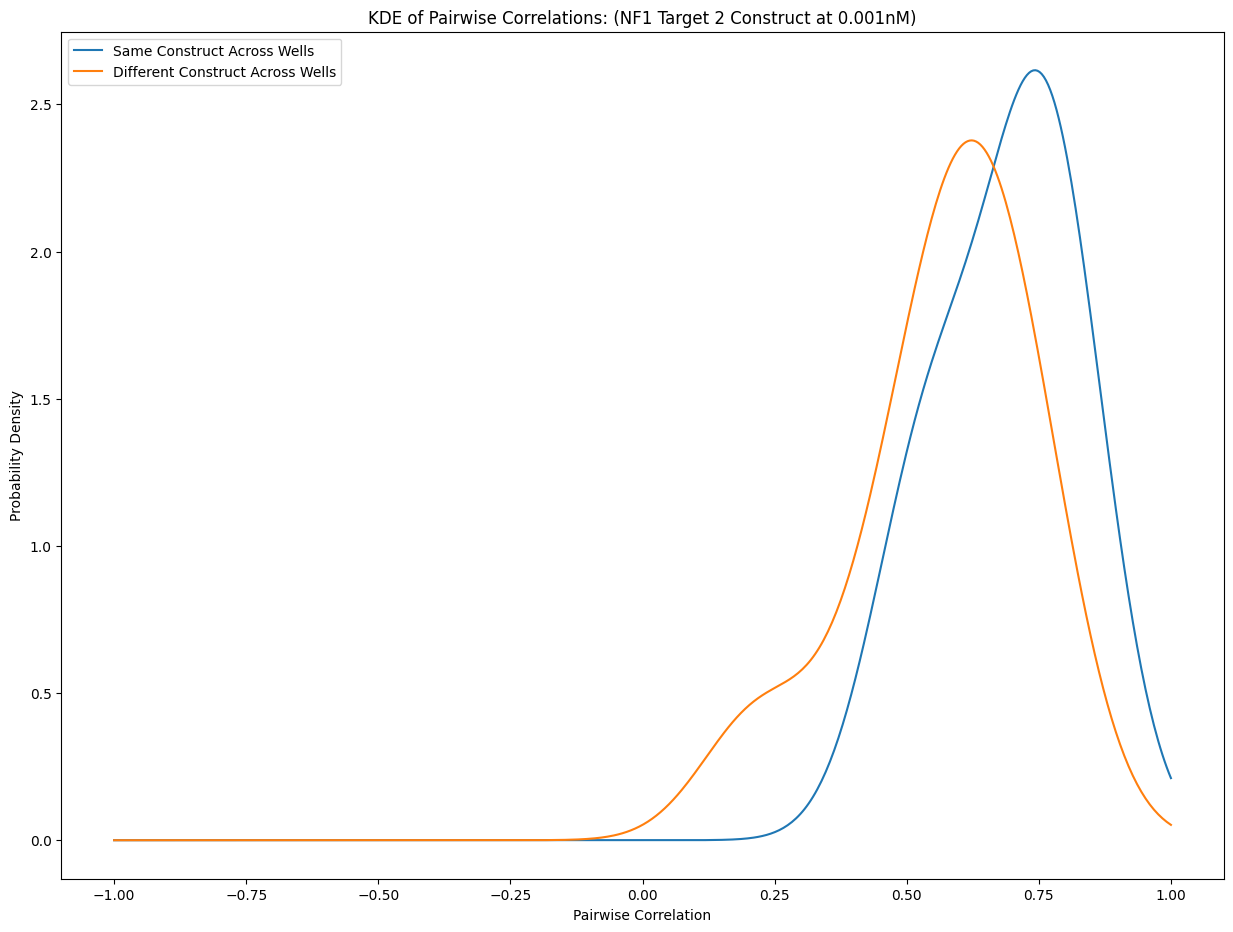

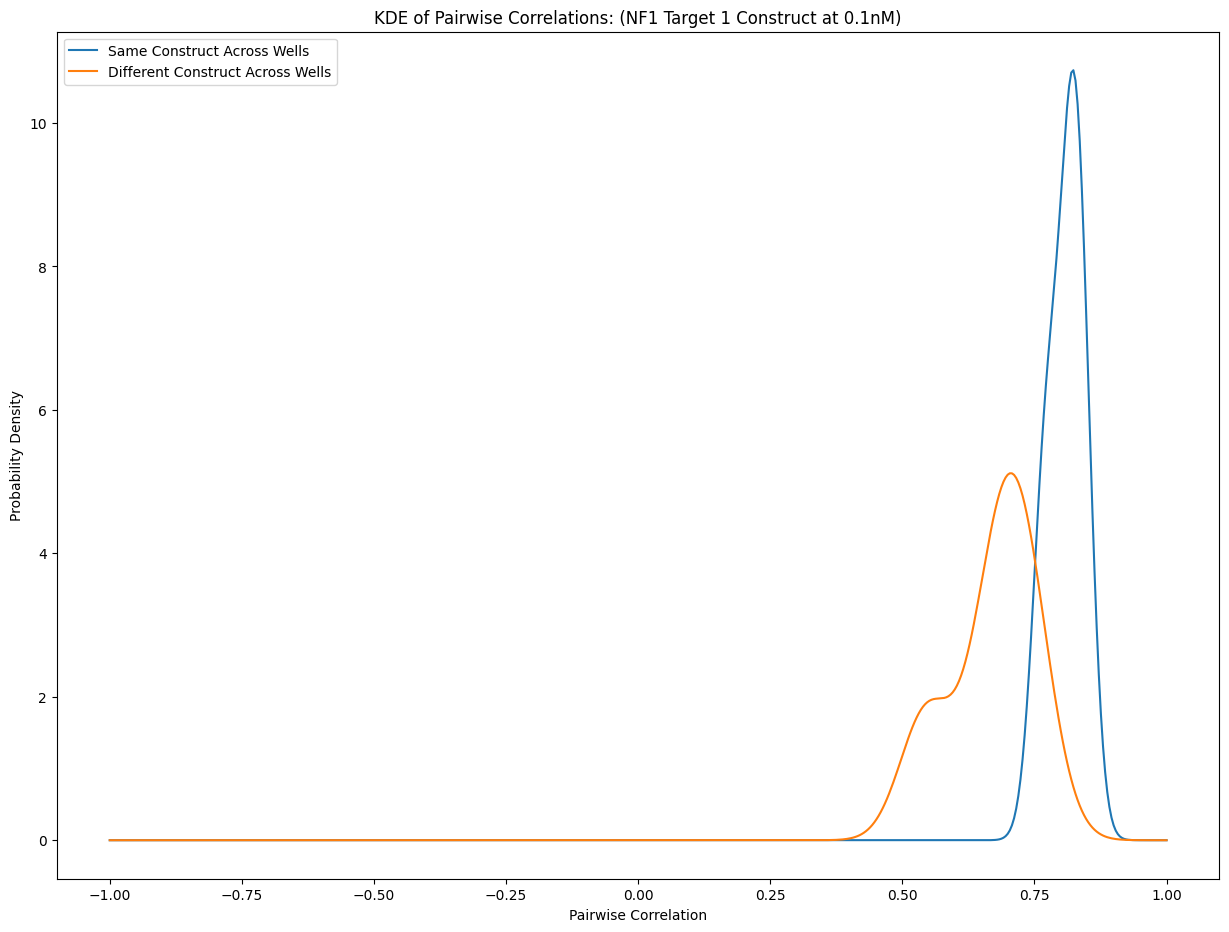

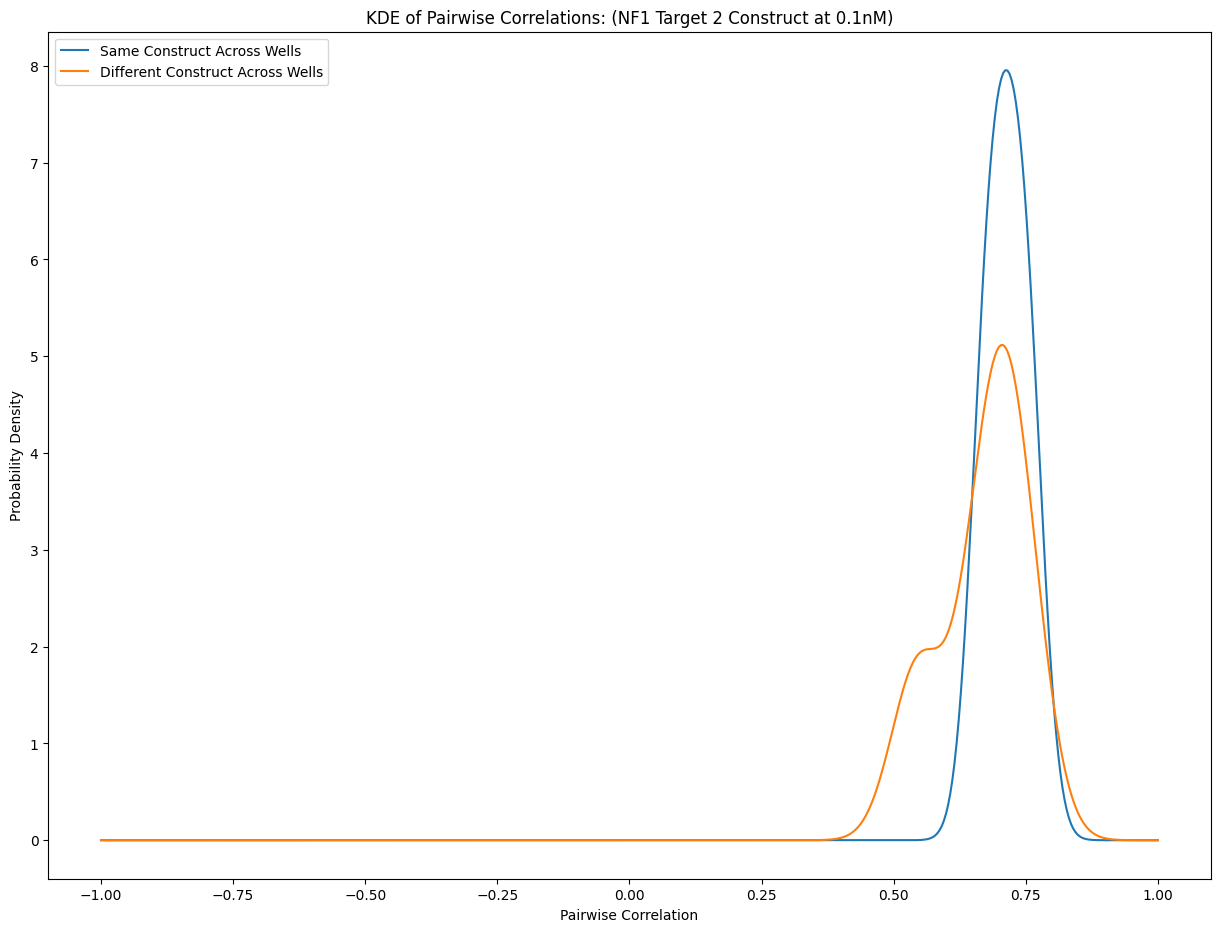

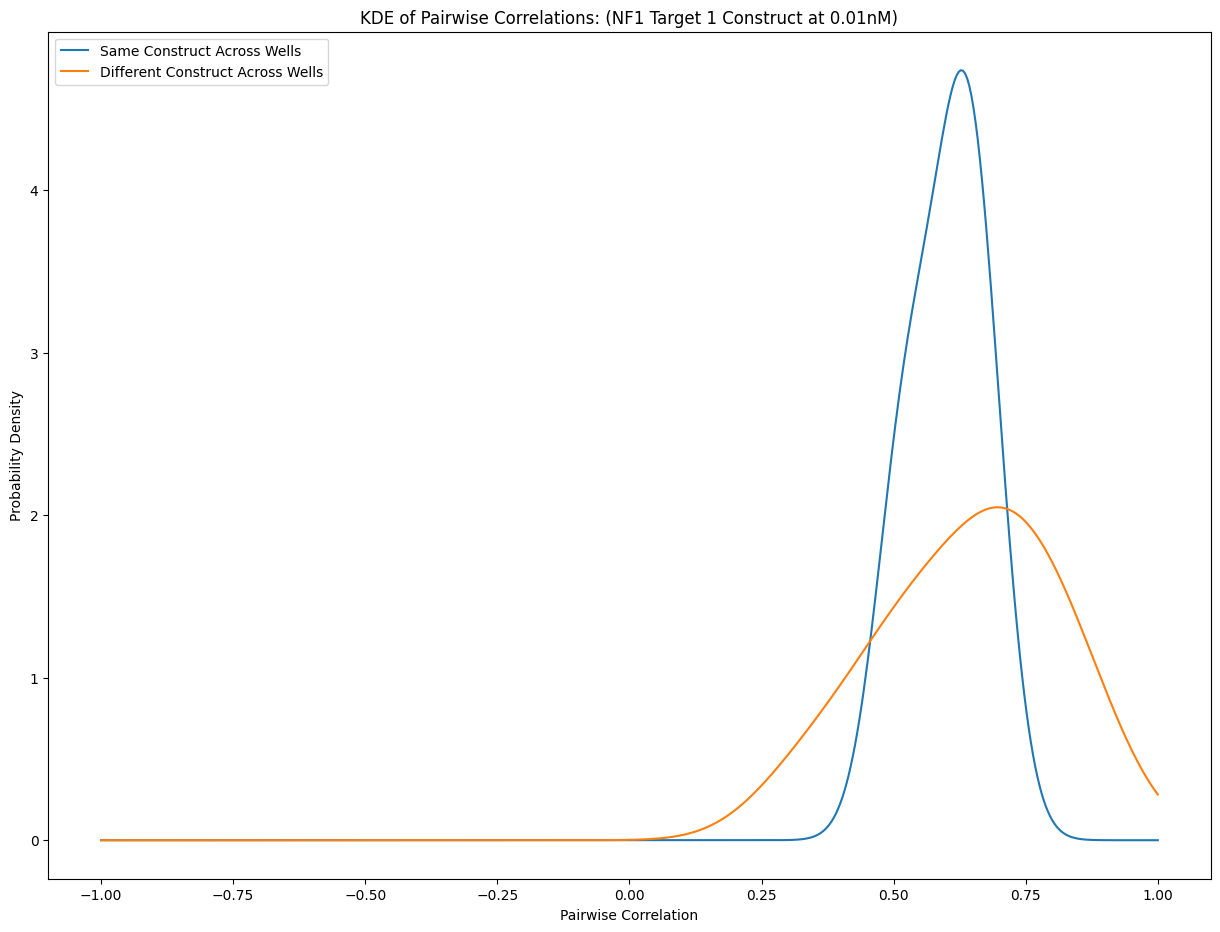

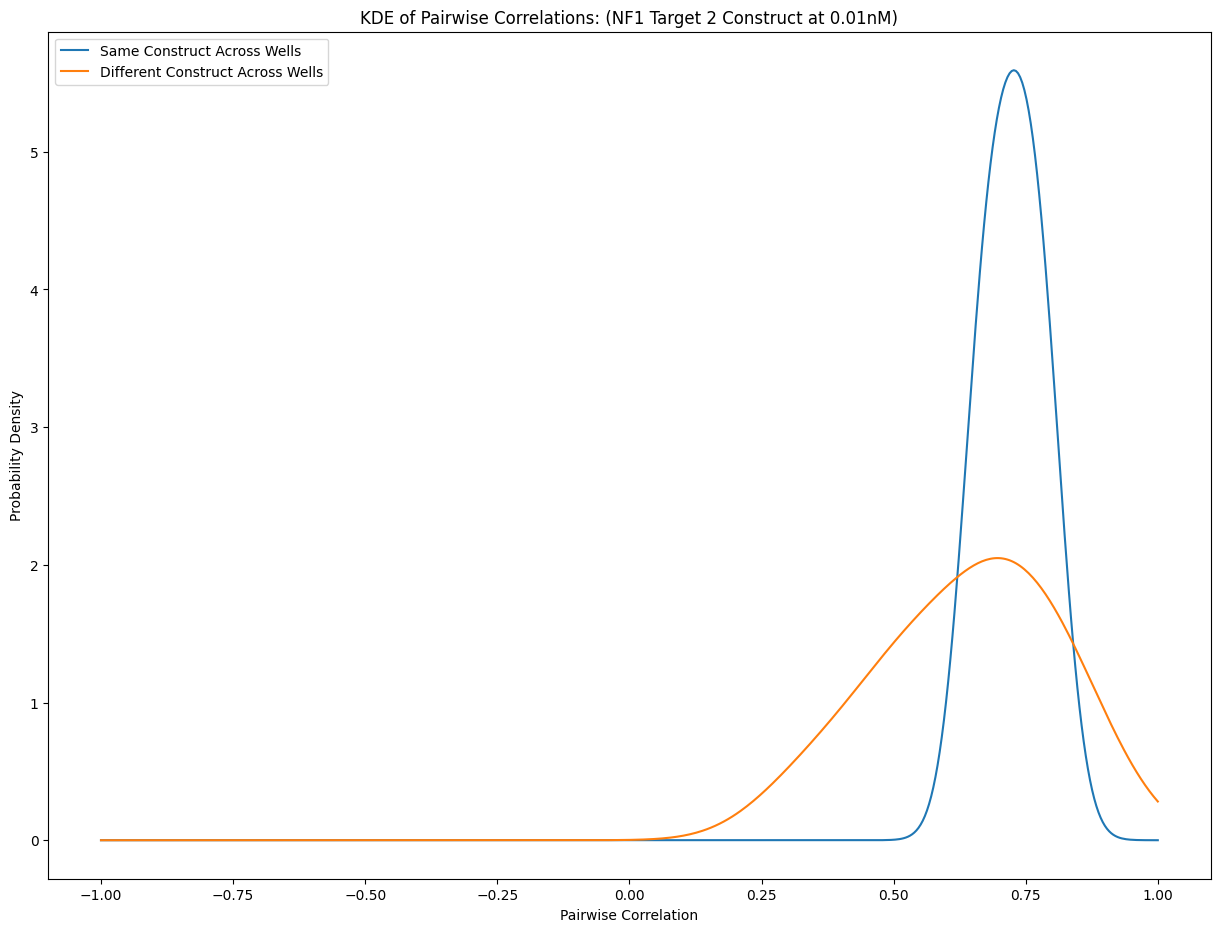

In [7]:
corr_obj.plot_correlations(output_path=output_path)